In [1]:
import tensorflow as tf


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

#path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

#PATH = os.path.join(os.path.dirname("C:\\Users\\Hp\\.keras\\datasets\\", 'cats_and_dogs_filtered')
PATH="C:\\Users\\Hp\\.keras\\datasets\\cats_and_dogs_filtered"

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [8]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
sample_training_images, _ = next(train_data_gen)


In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

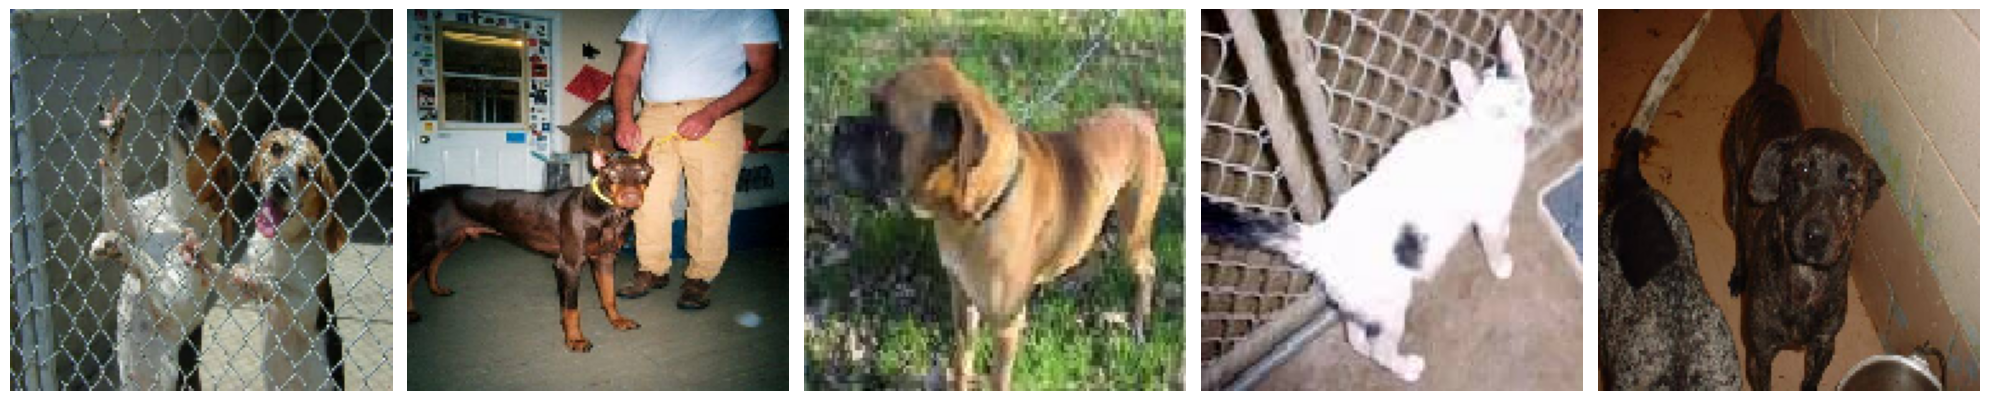

In [14]:
plotImages(sample_training_images[:5])


In [15]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
model.save('model.h5')



C:\Users\Hp\Anaconda3\envs\idp\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
15/15 [==============================] - 34s 2s/step - loss: 1.0696 - accuracy: 0.4947 - val_loss: 0.6894 - val_accuracy: 0.4978
Epoch 2/15
15/15 [==============================] - 28s 2s/step - loss: 0.6903 - accuracy: 0.5043 - val_loss: 0.6847 - val_accuracy: 0.5089
Epoch 3/15
15/15 [==============================] - 28s 2s/step - loss: 0.6680 - accuracy: 0.5550 - val_loss: 0.6290 - val_accuracy: 0.6295
Epoch 4/15
15/15 [==============================] - 26s 2s/step - loss: 0.5955 - accuracy: 0.6549 - val_loss: 0.5799 - val_accuracy: 0.6473
Epoch 5/15
15/15 [==============================] - 25s 2s/step - loss: 0.5258 - accuracy: 0.7297 - val_loss: 0.5639 - val_accuracy: 0.7009
Epoch 6/15
15/15 [==============================] - 25s 2s/step - loss: 0.4734 - accuracy: 0.7618 - val_loss: 0.5723 - val_accuracy: 0.7076
Epoch 7/15
15/15 [==============================] - 25s 2s/step - loss: 0.4456 - accuracy: 0.7810 - val_loss: 0.6125 - val_accuracy: 0.6641
Epoch 8/15
15/15 [==

In [19]:
!pip install pydot

In [20]:
from keras.models import load_model
from keras.utils.vis_utils import model_to_dot
from graphviz import Source

# load the trained Keras model
model = load_model('model.h5')

# convert the model architecture to DOT format
dot = model_to_dot(model, show_shapes=True)

# convert the DOT format to XML format
src = Source(dot.to_string())
xml = src.pipe(format='xml').decode('utf-8')

# save the XML file
with open('my_model.xml', 'w') as f:
    f.write(xml)


ValueError: unknown format: 'xml' (must be one of ['bmp', 'canon', 'cgimage', 'cmap', 'cmapx', 'cmapx_np', 'dot', 'dot_json', 'eps', 'exr', 'fig', 'gd', 'gd2', 'gif', 'gtk', 'gv', 'ico', 'imap', 'imap_np', 'ismap', 'jp2', 'jpe', 'jpeg', 'jpg', 'json', 'json0', 'pct', 'pdf', 'pic', 'pict', 'plain', 'plain-ext', 'png', 'pov', 'ps', 'ps2', 'psd', 'sgi', 'svg', 'svgz', 'tga', 'tif', 'tiff', 'tk', 'vml', 'vmlz', 'vrml', 'wbmp', 'webp', 'x11', 'xdot', 'xdot1.2', 'xdot1.4', 'xdot_json', 'xlib'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.models import load_model

import cv2

import numpy as np


img = cv2.imread('C:\\Users\\Hp\\.keras\\datasets\\cats_and_dogs_filtered\\train\\dogs\\dog.5.JPG')


img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img)

print(classes) 
